In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data["deposit"]

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [6]:
data=data.drop(["day", "month","pdays", "previous","contact","default"], axis=1)

In [7]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,1042,1,unknown,yes
1,56,admin.,married,secondary,45,no,no,1467,1,unknown,yes
2,41,technician,married,secondary,1270,yes,no,1389,1,unknown,yes
3,55,services,married,secondary,2476,yes,no,579,1,unknown,yes
4,54,admin.,married,tertiary,184,no,no,673,2,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,257,1,unknown,no
11158,39,services,married,secondary,733,no,no,83,4,unknown,no
11159,32,technician,single,secondary,29,no,no,156,2,unknown,no
11160,43,technician,married,secondary,0,no,yes,9,2,failure,no


In [8]:
 print(data.dtypes)

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
duration      int64
campaign      int64
poutcome     object
deposit      object
dtype: object


In [9]:
data[["job"]] = data[["job"]].apply(lambda col:pd.Categorical(col).codes)
data[["marital"]] = data[["marital"]].apply(lambda col:pd.Categorical(col).codes)
data[["housing"]] = data[["housing"]].apply(lambda col:pd.Categorical(col).codes)
data[["poutcome"]] = data[["poutcome"]].apply(lambda col:pd.Categorical(col).codes)
data[["deposit"]] = data[["deposit"]].apply(lambda col:pd.Categorical(col).codes)
data[["education"]] = data[["education"]].apply(lambda col:pd.Categorical(col).codes)
data[["loan"]] = data[["loan"]].apply(lambda col:pd.Categorical(col).codes)

In [10]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,0,1,1,2343,1,0,1042,1,3,1
1,56,0,1,1,45,0,0,1467,1,3,1
2,41,9,1,1,1270,1,0,1389,1,3,1
3,55,7,1,1,2476,1,0,579,1,3,1
4,54,0,1,2,184,0,0,673,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,257,1,3,0
11158,39,7,1,1,733,0,0,83,4,3,0
11159,32,9,2,1,29,0,0,156,2,3,0
11160,43,9,1,1,0,0,1,9,2,0,0


In [11]:
y=data["deposit"]  #dependent
x=data.drop("deposit", axis=1) #independent

In [12]:
x

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,2343,1,0,1042,1,3
1,56,0,1,1,45,0,0,1467,1,3
2,41,9,1,1,1270,1,0,1389,1,3
3,55,7,1,1,2476,1,0,579,1,3
4,54,0,1,2,184,0,0,673,2,3
...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,257,1,3
11158,39,7,1,1,733,0,0,83,4,3
11159,32,9,2,1,29,0,0,156,2,3
11160,43,9,1,1,0,0,1,9,2,0


In [13]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int8

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [16]:
x_train

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome
8866,31,1,1,1,0,1,0,133,1,3
644,55,9,1,1,264,1,1,1150,5,3
10668,34,9,2,1,664,1,1,88,2,1
4014,24,4,2,2,393,0,0,1298,1,3
1462,34,4,2,2,2646,0,0,142,1,3
...,...,...,...,...,...,...,...,...,...,...
6017,54,4,0,2,3473,1,0,306,2,3
709,41,6,1,2,231,0,0,352,2,3
10679,35,4,0,2,771,1,1,221,5,3
8366,33,7,1,2,597,0,0,134,1,3


In [17]:
x_test

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome
9921,42,9,2,1,823,1,0,137,1,3
6373,35,1,1,1,154,1,0,211,4,3
9874,47,9,1,2,2155,0,0,178,3,3
1278,26,0,2,1,2509,0,0,654,3,3
1590,29,6,1,1,123,0,1,158,2,2
...,...,...,...,...,...,...,...,...,...,...
8299,41,7,1,1,241,1,1,144,1,3
7286,44,9,1,1,5163,0,0,48,2,3
4733,26,4,2,2,390,0,0,325,1,3
2898,42,4,1,2,2816,0,0,193,2,3


In [18]:
y_train

8866     0
644      1
10668    0
4014     1
1462     1
        ..
6017     0
709      1
10679    0
8366     0
1146     1
Name: deposit, Length: 8929, dtype: int8

In [19]:
y_test

9921    0
6373    0
9874    0
1278    1
1590    1
       ..
8299    0
7286    0
4733    1
2898    1
8421    0
Name: deposit, Length: 2233, dtype: int8

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt=DecisionTreeClassifier()

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dt.predict(x_test)

In [24]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int8)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
confusion_matrix(y_test, y_pred)

array([[864, 309],
       [287, 773]], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.7330944917151814

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf=RandomForestClassifier()

In [30]:
 rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred=rf.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [33]:
confusion_matrix(y_test, y_pred)

array([[956, 217],
       [217, 843]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.8056426332288401

In [43]:
from sklearn.cluster import KMeans

In [44]:
from sklearn.datasets import make_blobs
features, true_labels = make_blobs(n_samples=200,centers=2,cluster_std=2.75,random_state=42 )

In [45]:
features[:5]

array([[ 0.25520277,  0.32488837],
       [ 5.52735488, -0.30171541],
       [ 4.70728182,  3.34266498],
       [-5.43053284, 10.31666531],
       [ 5.41260647,  0.260746  ]])

In [46]:
true_labels[:5]

array([1, 1, 1, 0, 1])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
scaled_features = scaler.fit_transform(features)

In [49]:
scaled_features[:5]

array([[-0.16911688, -1.18949511],
       [ 0.95951447, -1.33149804],
       [ 0.78395805, -0.50559701],
       [-1.38628576,  1.07487304],
       [ 0.93494981, -1.20403126]])

In [50]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [51]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [52]:
kmeans.inertia_

129.38411431893383

In [53]:
kmeans.cluster_centers_

array([[-0.7929145 ,  0.80345869],
       [ 0.84196076, -0.85315717]])

In [54]:
kmeans.n_iter_

4

In [55]:
kmeans.labels_[:5]

array([1, 1, 1, 0, 1])

In [56]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}

In [57]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


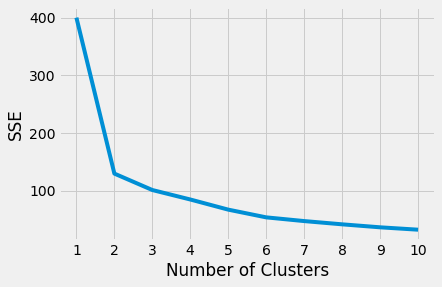

In [58]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [59]:
from kneed import KneeLocator

In [60]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [61]:
kl.elbow

2

In [62]:
silhouette_coefficients = []

In [63]:
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

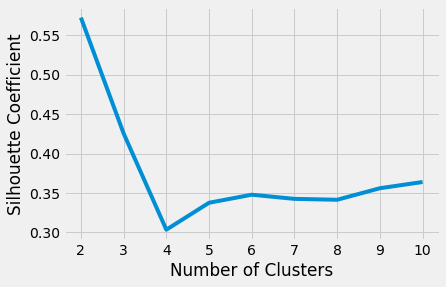

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [66]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)
scaled_features = scaler.fit_transform(features)

In [67]:
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

In [68]:
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

DBSCAN(eps=0.3)

In [69]:
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round (2)

In [70]:
kmeans_silhouette

0.5

In [71]:
dbscan_silhouette

0.38

In [72]:
import sklearn.cluster as cluster

In [73]:
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
kmeans = kmeans.fit(data[['deposit','poutcome']])

In [74]:
kmeans.cluster_centers_

array([[0.46440353, 2.88602746],
       [0.52407932, 0.30424929]])

In [76]:
data['Clusters'] = kmeans.labels_

In [77]:
data.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit,Clusters
0,59,0,1,1,2343,1,0,1042,1,3,1,0
1,56,0,1,1,45,0,0,1467,1,3,1,0
2,41,9,1,1,1270,1,0,1389,1,3,1,0
3,55,7,1,1,2476,1,0,579,1,3,1,0
4,54,0,1,2,184,0,0,673,2,3,1,0


In [79]:
data['Clusters'].value_counts()

0    9397
1    1765
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='deposit', ylabel='job'>

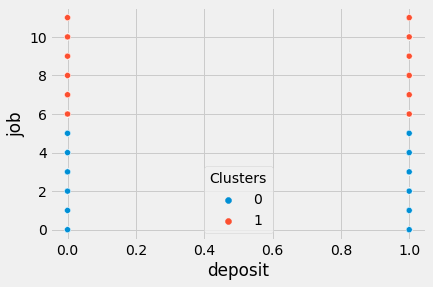

In [96]:
sns.scatterplot(x="deposit", y="job",hue = 'Clusters',  data=data)

In [41]:
data.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,0,1,1,2343,1,0,1042,1,3,1
1,56,0,1,1,45,0,0,1467,1,3,1
2,41,9,1,1,1270,1,0,1389,1,3,1
3,55,7,1,1,2476,1,0,579,1,3,1
4,54,0,1,2,184,0,0,673,2,3,1


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

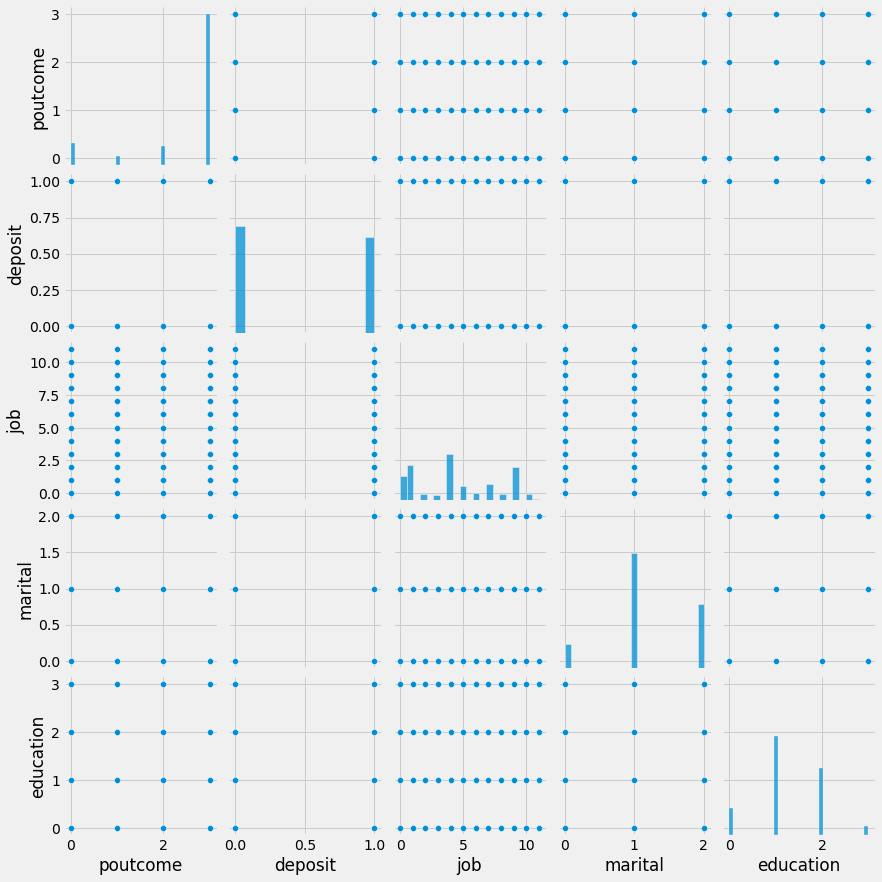

In [82]:
sns.pairplot(data[['poutcome','deposit','job','marital','education']])

In [83]:
import sklearn.cluster as cluster

In [84]:
kmeans = cluster.KMeans(n_clusters=2 ,init="k-means++")
kmeans = kmeans.fit(data[['deposit','job','marital','education']])

In [85]:
kmeans.cluster_centers_

array([[0.46899225, 2.43300111, 1.1416113 , 1.27754707],
       [0.48273235, 8.25749111, 1.30523108, 1.29913662]])

In [86]:
data['Clusters'] = kmeans.labels_

In [87]:
data.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit,Clusters
0,59,0,1,1,2343,1,0,1042,1,3,1,0
1,56,0,1,1,45,0,0,1467,1,3,1,0
2,41,9,1,1,1270,1,0,1389,1,3,1,1
3,55,7,1,1,2476,1,0,579,1,3,1,1
4,54,0,1,2,184,0,0,673,2,3,1,0


In [88]:
data['Clusters'].value_counts()

0    7224
1    3938
Name: Clusters, dtype: int64

In [89]:
data.to_csv('depositcluster.csv', index = False)

<AxesSubplot:xlabel='marital', ylabel='poutcome'>

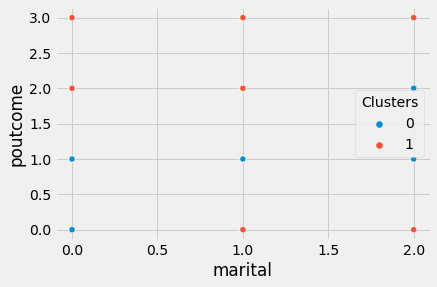

In [113]:
sns.scatterplot(x="marital", y="poutcome",hue = 'Clusters',  data=data)

In [92]:
import numpy as np

In [94]:
from sklearn.cluster import KMeans

In [98]:
x

,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,2343,1,0,1042,1,3
1,56,0,1,1,45,0,0,1467,1,3
2,41,9,1,1,1270,1,0,1389,1,3
3,55,7,1,1,2476,1,0,579,1,3
4,54,0,1,2,184,0,0,673,2,3
...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,1,1,0,257,1,3
11158,39,7,1,1,733,0,0,83,4,3
11159,32,9,2,1,29,0,0,156,2,3
11160,43,9,1,1,0,0,1,9,2,0


<AxesSubplot:>

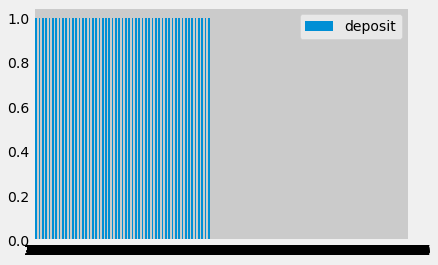

In [123]:
data.plot.bar(y='deposit', rot=0)